In [11]:
import gymnasium as gym
import sys
from bettermdptools.algorithms.planner import Planner
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.grid_search import GridSearch
from bettermdptools.utils.plots import Plots
from bettermdptools.utils.test_env import TestEnv
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
from bettermdptools.utils.decorators import add_to
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np
from itertools import accumulate
import operator
import seaborn as sns
pd.options.display.max_rows = 4000
np.set_printoptions(threshold = sys.maxsize)

In [12]:
# make gym environment 
env = gym.make('Blackjack-v1', render_mode=None)
blackjack = BlackjackWrapper(env)

In [13]:
def values_heat_map(data, title, size):
        data = np.around(np.array(data).reshape(size), 2)
        df = pd.DataFrame(data=data)
        sns.heatmap(df, annot=True).set_title(title)

In [14]:
def modified_plot_policy(val_max, directions, map_size, title):
    """Plot the policy learned."""
    sns.heatmap(
        val_max,
        annot=directions,
        fmt="",
        cmap=sns.color_palette("magma_r", as_cmap=True),
        linewidths=0.7,
        linecolor="black",
    ).set(title=title)
    img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"

## State values heat map

## Grid Search

In [3]:
gamma=[.7, .9, .99, 1]
n_iters = [1000, 5000, 7500, 10000]
theta=[.001, .00001, 0.0000000001]
GridSearch.vi_grid_search(blackjack, gamma=gamma, n_iters=n_iters, theta=theta)

running VI with gamma: 0.7  n_iters: 1000  theta: 0.001
runtime = 0.02 seconds
Avg. episode reward:  0.0
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-05
runtime = 0.01 seconds
Avg. episode reward:  0.03
###################
running VI with gamma: 0.7  n_iters: 1000  theta: 1e-10
runtime = 0.02 seconds
Avg. episode reward:  -0.03
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 0.001
runtime = 0.01 seconds
Avg. episode reward:  -0.13
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 1e-05
runtime = 0.01 seconds
Avg. episode reward:  -0.09
###################
running VI with gamma: 0.7  n_iters: 5000  theta: 1e-10
runtime = 0.02 seconds
Avg. episode reward:  0.01
###################
running VI with gamma: 0.7  n_iters: 7500  theta: 0.001
runtime = 0.01 seconds
Avg. episode reward:  -0.03
###################
running VI with gamma: 0.7  n_iters: 7500  theta: 1e-05
runtime = 0.01 seconds
Avg. episode reward:  -0.05
########

/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.01 seconds
Avg. episode reward:  0.04
###################
running VI with gamma: 0.9  n_iters: 1000  theta: 1e-05
runtime = 0.01 seconds
Avg. episode reward:  -0.03
###################
running VI with gamma: 0.9  n_iters: 1000  theta: 1e-10
runtime = 0.02 seconds
Avg. episode reward:  -0.05
###################
running VI with gamma: 0.9  n_iters: 5000  theta: 0.001
runtime = 0.01 seconds
Avg. episode reward:  -0.04
###################
running VI with gamma: 0.9  n_iters: 5000  theta: 1e-05
runtime = 0.01 seconds
Avg. episode reward:  -0.03
###################
running VI with gamma: 0.9  n_iters: 5000  theta: 1e-10
runtime = 0.02 seconds
Avg. episode reward:  -0.04
###################
running VI with gamma: 0.9  n_iters: 7500  theta: 0.001
runtime = 0.01 seconds
Avg. episode reward:  0.04
###################
running VI with gamma: 0.9  n_iters: 7500  theta: 1e-05
runtime = 0.01 seconds
Avg. episode reward:  -0.1
###################
running VI with gamma: 0.9  n_iters: 7500  

runtime = 0.02 seconds


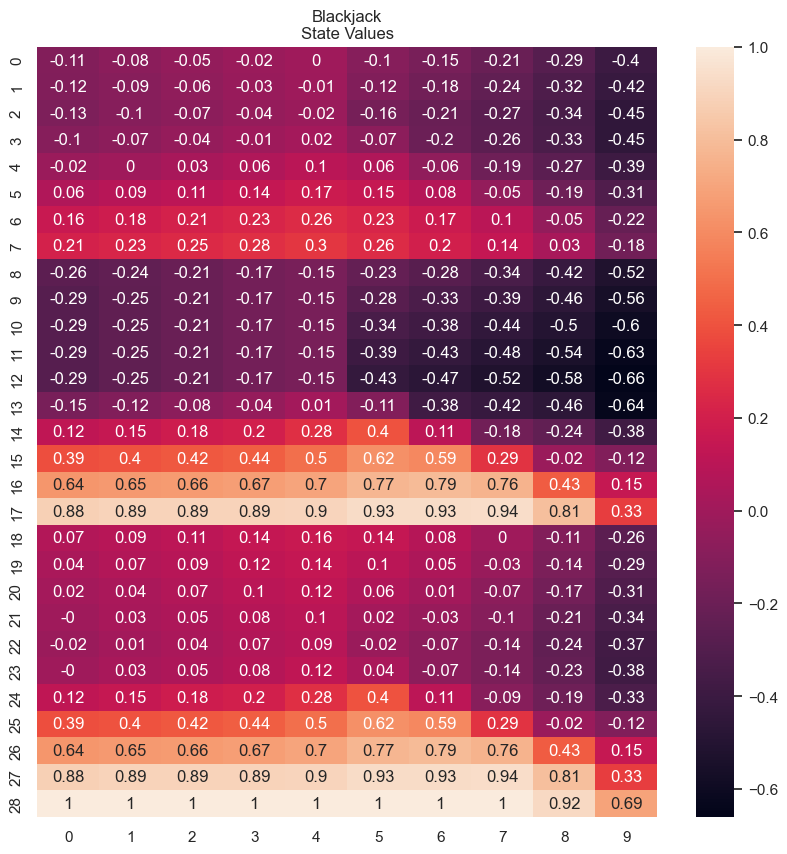

In [46]:
# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, gamma=.9, theta=0.001)


#plot state values
size=(29,10)
plt.figure(figsize=(10,10))
values_heat_map(V, "Blackjack\nState Values", size)
plt.savefig('plots/blackjack/VI_state_values.png', dpi=300)
plt.show()

In [5]:
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({-1.0: 4820, 1.0: 4322, 0.0: 858})
-0.0498


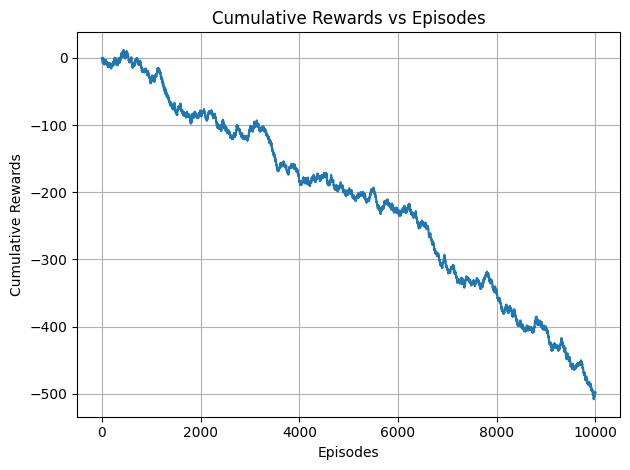

In [6]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.grid()
plt.tight_layout()
plt.savefig('plots/blackjack/VI_rewards_episodes.png', dpi=300)

## State values v. iterations

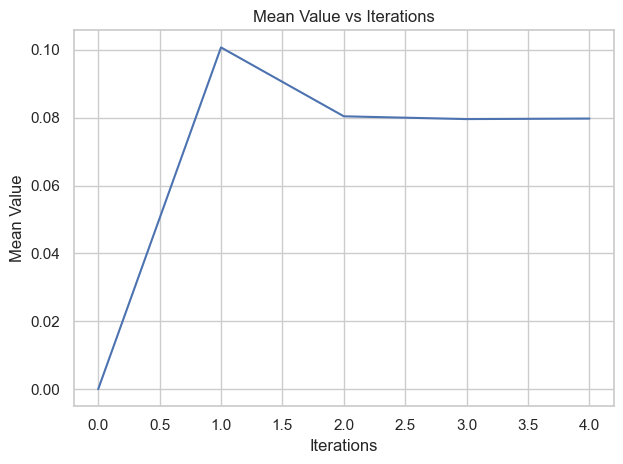

In [14]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/blackjack/VI_opt_val_iters.png', dpi=300)

## Gamma Changes

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds


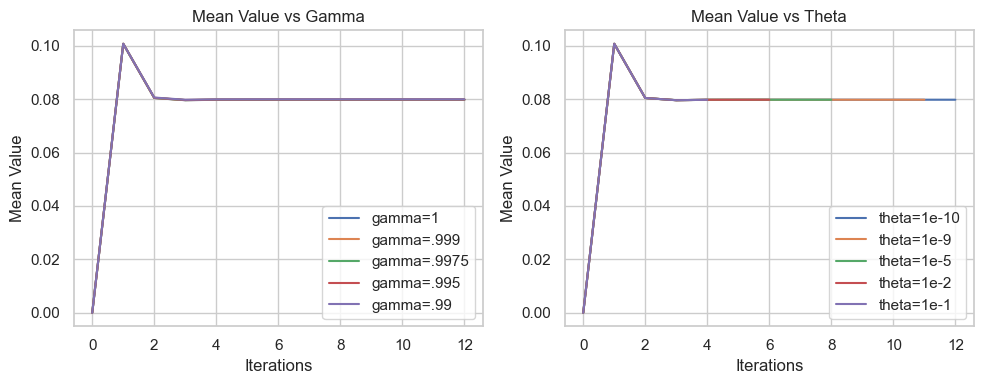

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, theta=1e-9)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, theta=1e-5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, theta=1e-2)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=1000, theta=1e-1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/blackjack/VI_hyperparams_mean_value.png', dpi=300)

runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds
runtime = 0.01 seconds


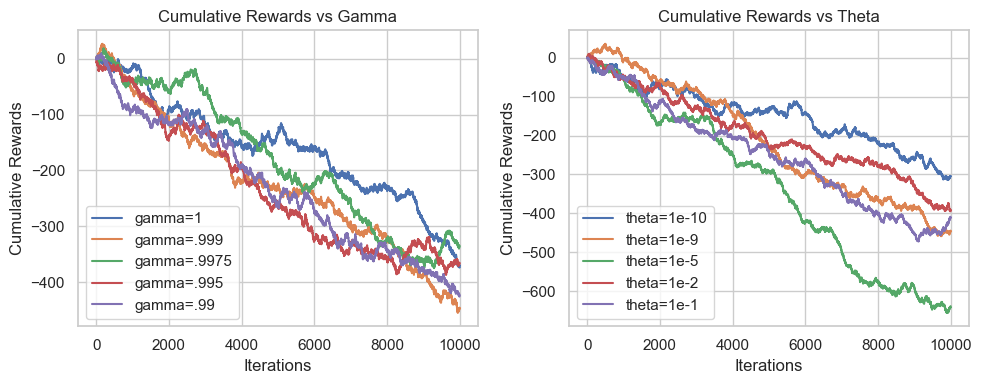

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, gamma=.999)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, gamma=.995)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, gamma=.99)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, theta=1e-9)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, theta=1e-5)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, theta=1e-2)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, theta=1e-1)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/blackjack/VI_hyperparams_rewards.png', dpi=300)

## Policy maps

runtime = 0.02 seconds


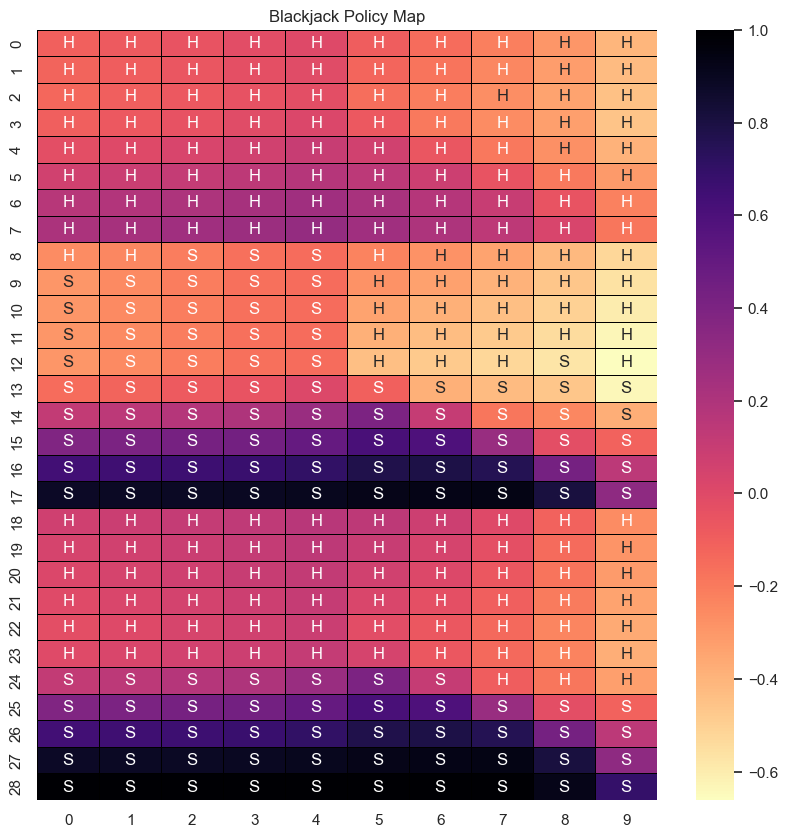

In [38]:
V, V_track, pi = Planner(blackjack.P).value_iteration(n_iters=10000, gamma=.9, theta=0.001)
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29,10)
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)


plt.figure(figsize=(10,10))
title = "Blackjack Policy Map"
modified_plot_policy(val_max, policy_map, blackjack_map_size, title)
plt.savefig('plots/blackjack/VI_policy_map.png', dpi=300)
plt.show()

# Policy Iteration

## Grid Search

In [18]:
gamma=[.7, .9, .99, 1]
n_iters = [1000, 5000, 7500, 10000]
theta=[.001, .00001, 0.0000000001]
GridSearch.pi_grid_search(blackjack, gamma=gamma, n_iters=n_iters, theta=theta)

running PI with gamma: 0.7  n_iters: 1000  theta: 0.001
runtime = 0.03 seconds
Avg. episode reward:  -0.25
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  0.0
###################
running PI with gamma: 0.7  n_iters: 1000  theta: 1e-10
runtime = 0.02 seconds
Avg. episode reward:  -0.07
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 0.001
runtime = 0.01 seconds
Avg. episode reward:  -0.09
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  -0.07
###################
running PI with gamma: 0.7  n_iters: 5000  theta: 1e-10
runtime = 0.02 seconds
Avg. episode reward:  -0.2
###################
running PI with gamma: 0.7  n_iters: 7500  theta: 0.001
runtime = 0.02 seconds
Avg. episode reward:  -0.1
###################
running PI with gamma: 0.7  n_iters: 7500  theta: 1e-05
runtime = 0.02 seconds
Avg. episode reward:  -0.1
#########

runtime = 0.04 seconds


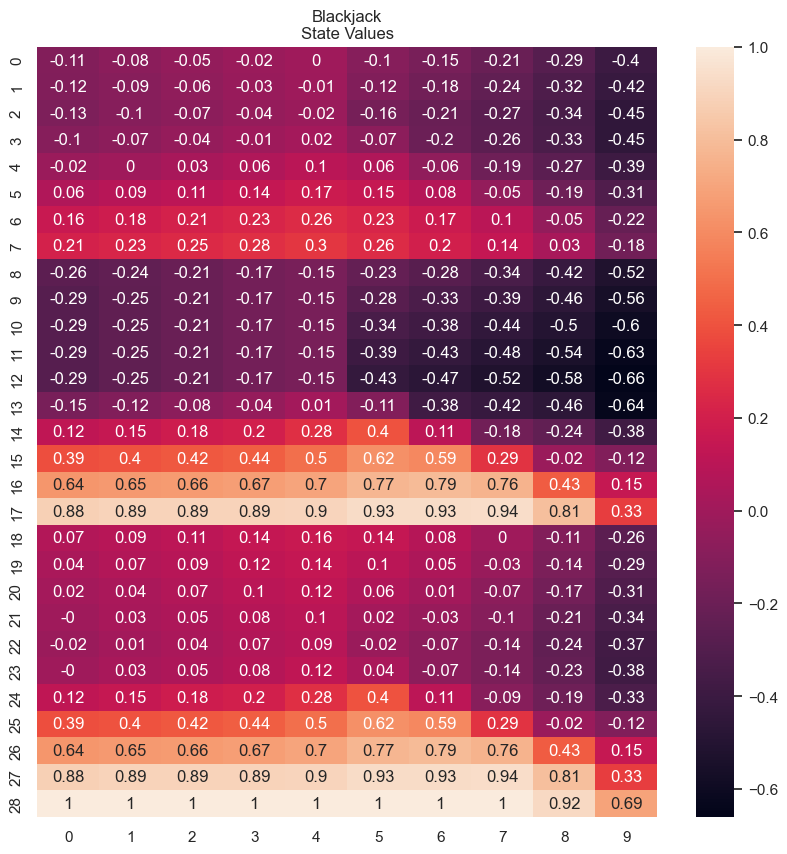

In [47]:
# run VI
V, V_track, pi = Planner(blackjack.P).policy_iteration(gamma=0.9, n_iters=1000, theta=1e-10)


#plot state values
size=(29,10)
plt.figure(figsize=(10,10))
values_heat_map(V, "Blackjack\nState Values", size)
plt.savefig('plots/blackjack/PI_state_values.png', dpi=300)
plt.show()

In [21]:
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({-1.0: 4738, 1.0: 4382, 0.0: 880})
-0.0356


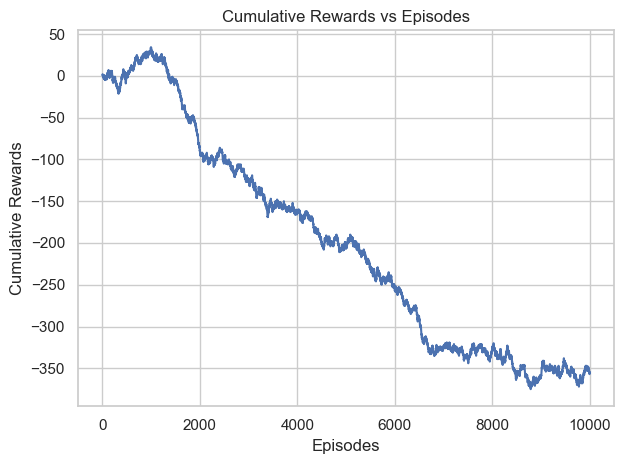

In [22]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.tight_layout()
plt.savefig('plots/blackjack/PI_rewards_episodes.png', dpi=300)

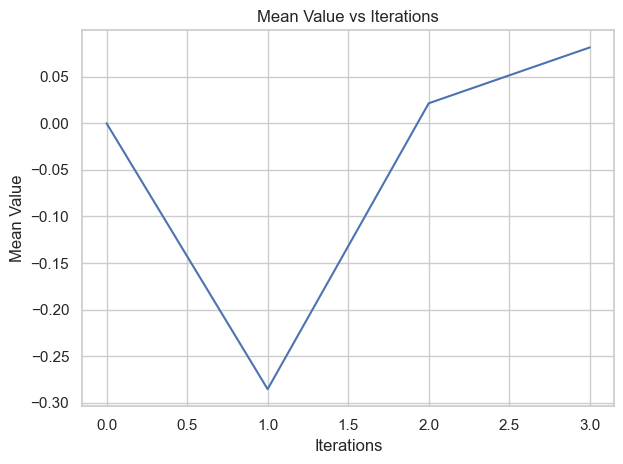

In [23]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
plt.xlabel('Iterations')
plt.ylabel('Mean Value')
plt.title("Mean Value vs Iterations")
plt.plot(max_value_per_iter)
plt.tight_layout()
plt.savefig('plots/blackjack/PI_opt_val_iters.png', dpi=300)

runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds


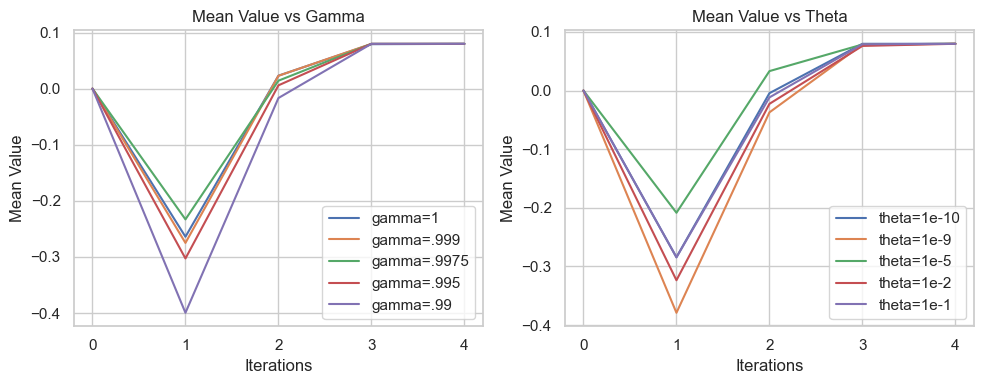

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-9)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-2)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/blackjack/PI_hyperparams_mean_value.png', dpi=300)

runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.03 seconds
runtime = 0.03 seconds
runtime = 0.02 seconds
runtime = 0.02 seconds
runtime = 0.01 seconds


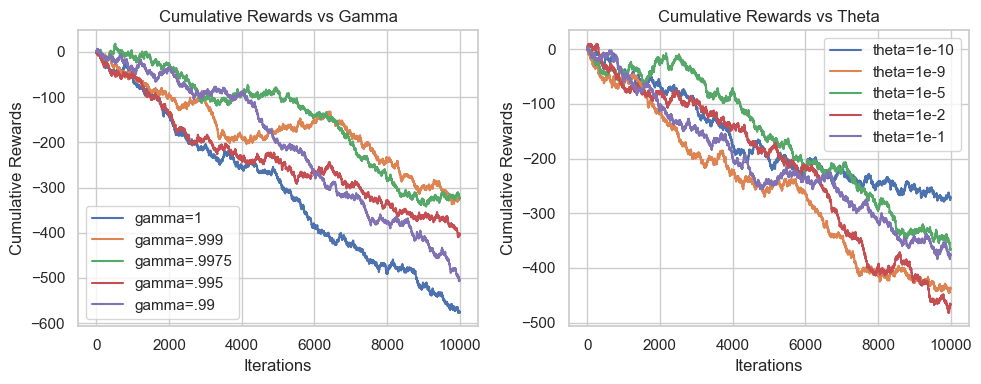

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# run VI
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.999)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.995)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, gamma=.99)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='theta=1e-10')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-9)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='theta=1e-9')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-5)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='theta=1e-5')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-2)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='theta=1e-2')
V, V_track, pi = Planner(blackjack.P).policy_iteration(n_iters=10000, theta=1e-1)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='theta=1e-1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Theta')
ax2.legend()

plt.tight_layout()
plt.savefig('plots/blackjack/PI_hyperparams_rewards.png', dpi=300)

runtime = 0.03 seconds


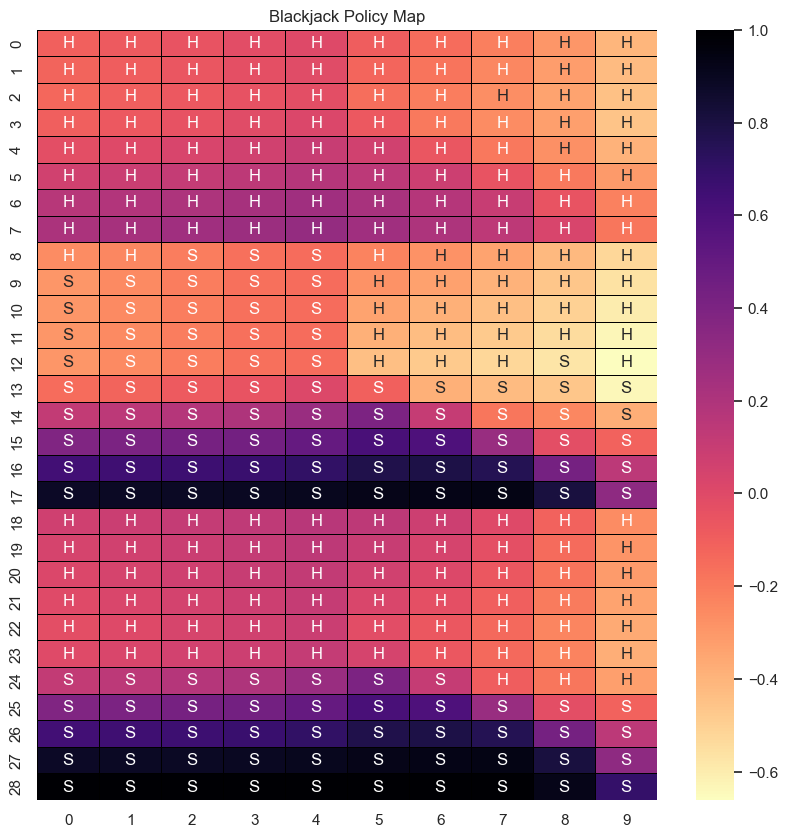

In [39]:
V, V_track, pi = Planner(blackjack.P).policy_iteration(gamma=0.9, n_iters=1000, theta=1e-10)
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29,10)
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)


plt.figure(figsize=(10,10))
title = "Blackjack Policy Map"
modified_plot_policy(val_max, policy_map, blackjack_map_size, title)
plt.savefig('plots/blackjack/PI_policy_map.png', dpi=300)
plt.show()

# Q-Learning

## Grid Search

In [27]:
gamma=[.25, .5, .75, .9, .99, 1]
n_iters = [10000]
epsilon_decay=[.25, .5, .75, .9, .99, 1]
GridSearch.q_learning_grid_search(blackjack, gamma=gamma, iters=n_iters, epsilon_decay=epsilon_decay)

running q_learning with gamma: 0.25 epsilon decay: 0.25  iterations: 10000


runtime = 0.62 seconds
Avg. episode reward:  -0.17
###################
running q_learning with gamma: 0.25 epsilon decay: 0.5  iterations: 10000


runtime = 0.58 seconds
Avg. episode reward:  -0.09
###################
running q_learning with gamma: 0.25 epsilon decay: 0.75  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.02
###################
running q_learning with gamma: 0.25 epsilon decay: 0.9  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.07
###################
running q_learning with gamma: 0.25 epsilon decay: 0.99  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.24
###################
running q_learning with gamma: 0.25 epsilon decay: 1  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  0.04
###################
running q_learning with gamma: 0.5 epsilon decay: 0.25  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  0.01
###################
running q_learning with gamma: 0.5 epsilon decay: 0.5  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.01
###################
running q_learning with gamma: 0.5 epsilon decay: 0.75  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.18
###################
running q_learning with gamma: 0.5 epsilon decay: 0.9  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.1
###################
running q_learning with gamma: 0.5 epsilon decay: 0.99  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.04
###################
running q_learning with gamma: 0.5 epsilon decay: 1  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.17
###################
running q_learning with gamma: 0.75 epsilon decay: 0.25  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.2
###################
running q_learning with gamma: 0.75 epsilon decay: 0.5  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  0.04
###################
running q_learning with gamma: 0.75 epsilon decay: 0.75  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.03
###################
running q_learning with gamma: 0.75 epsilon decay: 0.9  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.01
###################
running q_learning with gamma: 0.75 epsilon decay: 0.99  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.2
###################
running q_learning with gamma: 0.75 epsilon decay: 1  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.11
###################
running q_learning with gamma: 0.9 epsilon decay: 0.25  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.12
###################
running q_learning with gamma: 0.9 epsilon decay: 0.5  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.19
###################
running q_learning with gamma: 0.9 epsilon decay: 0.75  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.18
###################
running q_learning with gamma: 0.9 epsilon decay: 0.9  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.17
###################
running q_learning with gamma: 0.9 epsilon decay: 0.99  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.13
###################
running q_learning with gamma: 0.9 epsilon decay: 1  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.07
###################
running q_learning with gamma: 0.99 epsilon decay: 0.25  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.01
###################
running q_learning with gamma: 0.99 epsilon decay: 0.5  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  0.04
###################
running q_learning with gamma: 0.99 epsilon decay: 0.75  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.15
###################
running q_learning with gamma: 0.99 epsilon decay: 0.9  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  -0.14
###################
running q_learning with gamma: 0.99 epsilon decay: 0.99  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  0.08
###################
running q_learning with gamma: 0.99 epsilon decay: 1  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.03
###################
running q_learning with gamma: 1 epsilon decay: 0.25  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  0.01
###################
running q_learning with gamma: 1 epsilon decay: 0.5  iterations: 10000


runtime = 0.56 seconds
Avg. episode reward:  0.01
###################
running q_learning with gamma: 1 epsilon decay: 0.75  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.09
###################
running q_learning with gamma: 1 epsilon decay: 0.9  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.14
###################
running q_learning with gamma: 1 epsilon decay: 0.99  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.18
###################
running q_learning with gamma: 1 epsilon decay: 1  iterations: 10000


runtime = 0.57 seconds
Avg. episode reward:  -0.18
###################


  0%|                                                 | 0/10000 [00:00<?, ?it/s]/Users/VivianNTran/anaconda3/envs/ML_A4_env/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


runtime = 0.61 seconds


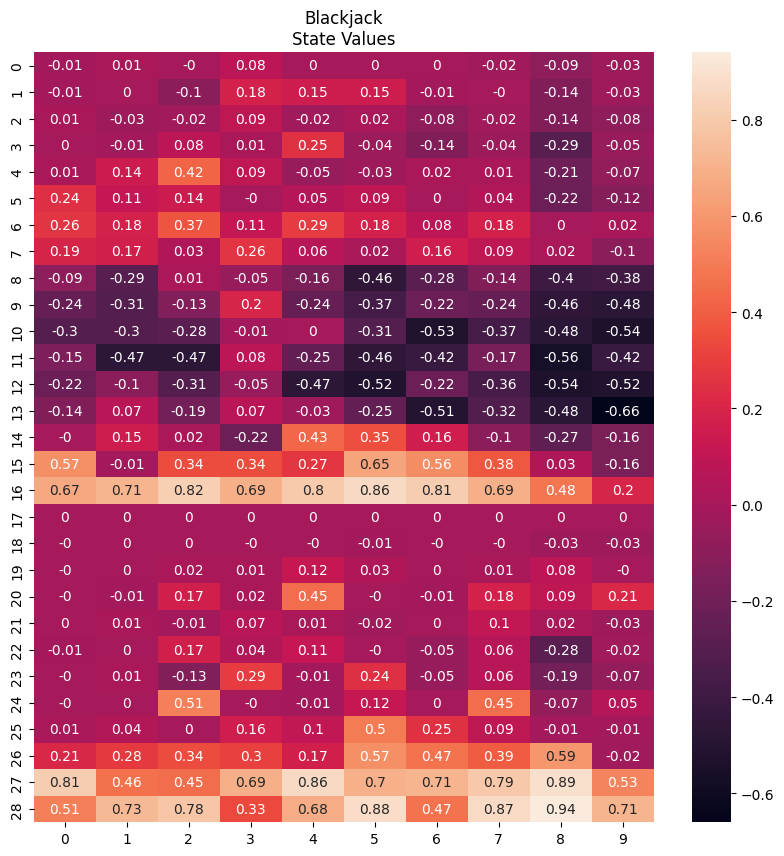

In [15]:
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=0.99, epsilon_decay_ratio=1, n_episodes=10000)


#plot state values
size=(29,10)
plt.figure(figsize=(10,10))
values_heat_map(V, "Blackjack\nState Values", size)
plt.savefig('plots/blackjack/QLearning_state_values.png', dpi=300)
plt.show()

In [7]:
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
print(Counter(test_scores))
print(np.mean(test_scores))

Counter({-1.0: 4939, 1.0: 4160, 0.0: 901})
-0.0779


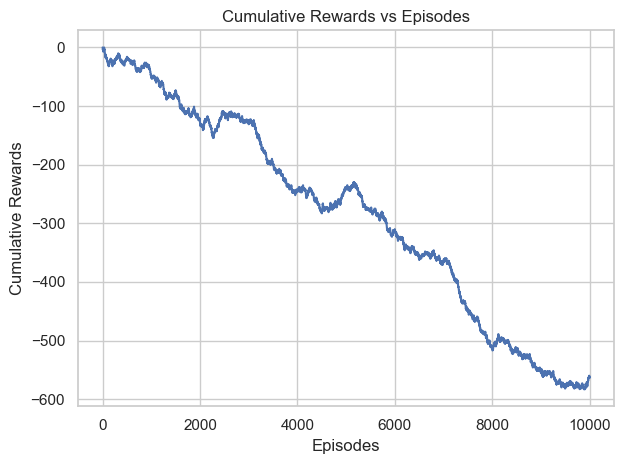

In [41]:
cumulative_sum_iter = accumulate(test_scores, operator.add)

plt.ylabel('Cumulative Rewards')
plt.xlabel('Episodes')
plt.title('Cumulative Rewards vs Episodes')
plt.plot(list(cumulative_sum_iter))
plt.tight_layout()
plt.savefig('plots/blackjack/QLearning_rewards_episodes.png', dpi=300)

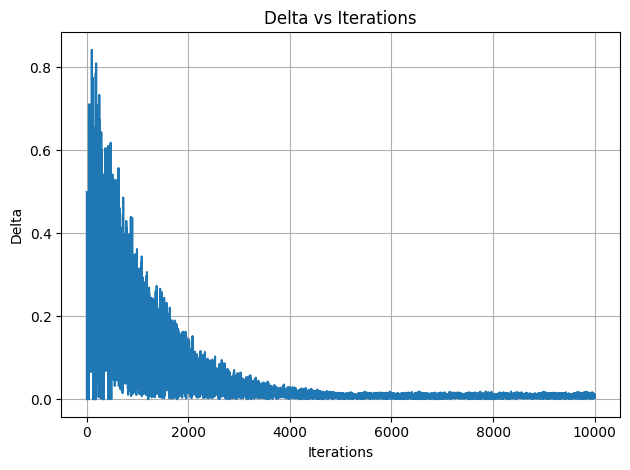

In [26]:
# Clip trailing zeros in case convergence is reached before max iterations
# This is likely when setting the n_iters parameter
delta_values = [np.max(np.abs(Q_track[i] - Q_track[i-1])) for i in range(1, len(Q_track))]
plt.xlabel('Iterations')
plt.ylabel('Delta')
plt.title("Delta vs Iterations")
plt.plot(delta_values)
plt.grid()
plt.tight_layout()
plt.savefig('plots/blackjack/QLearning_opt_val_iters.png', dpi=300)

In [25]:
print(delta_values)

[0.4995442534304194, 0.49908892650958625, 0.4986340188510909, 0.4981795300688784, 0.4977254597772507, 0.0, 0.49681857312472844, 0.49636575599421107, 0.49591335581503077, 0.0, 0.49500980477533135, 0.4945586531480191, 0.4941079169384592, 0.49365759576413665, 0.4932076892428901, 0.4927581969929091, 0.4923091186327351, 0.491860453781261, 0.49141220205773006, 0.4909643630817372, 0.4905169364732264, 0.490069921852492, 0.48962331884017846, 0.48917712705727917, 0.48873134612513613, 0.24613843887577563, 0.4878410153002323, 0.4873964646518984, 0.2461258381632751, 0.4865085909971413, 0.48606526723723037, 0.4856223516872171, 0.48517984397122477, 0.4847377437137219, 0.4842960505395229, 0.4838547640737883, 0.483413883942023, 0.24800269669375208, 0.4825333411841459, 0.24432136897911233, 0.4816544192768242, 0.48121556520954284, 0.4807771152364932, 0.48033906898558715, 0.0, 0.7104002303142174, 0.47902734884999276, 0.4785909137736335, 0.4781548805641131, 0.4777192488513946, 0.47728401826578276, 0.476849

runtime = 0.58 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.58 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.58 seconds


runtime = 0.57 seconds


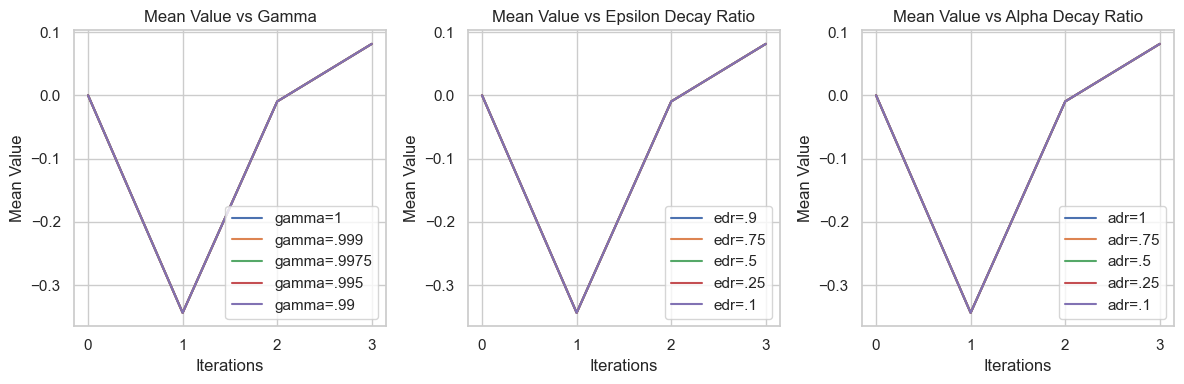

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# run VI
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000)
gamma1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma1, label='gamma=1')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.999)
gamma999 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma999, label='gamma=.999')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.9975)
gamma9975 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma9975, label='gamma=.9975')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.995)
gamma995 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma995, label='gamma=.995')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.99)
gamma99 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Mean Value')
ax1.set_title('Mean Value vs Gamma')
ax1.legend()

Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta10, label='edr=.9')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta9, label='edr=.75')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta5, label='edr=.5')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta2, label='edr=.25')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax2.plot(theta1, label='edr=.1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Mean Value')
ax2.set_title('Mean Value vs Epsilon Decay Ratio')
ax2.legend()

Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, alpha_decay_ratio=1)
theta10 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta10, label='adr=1')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
theta9 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta9, label='adr=.75')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
theta5 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta5, label='adr=.5')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
theta2 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta2, label='adr=.25')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
theta1 = np.trim_zeros(np.mean(V_track, axis=1), 'b')
ax3.plot(theta1, label='adr=.1')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Mean Value')
ax3.set_title('Mean Value vs Alpha Decay Ratio')
ax3.legend()

plt.tight_layout()
plt.savefig('plots/blackjack/QLearning_hyperparams_mean_value.png', dpi=300)

runtime = 0.58 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.56 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.59 seconds


runtime = 0.86 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.58 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


runtime = 0.57 seconds


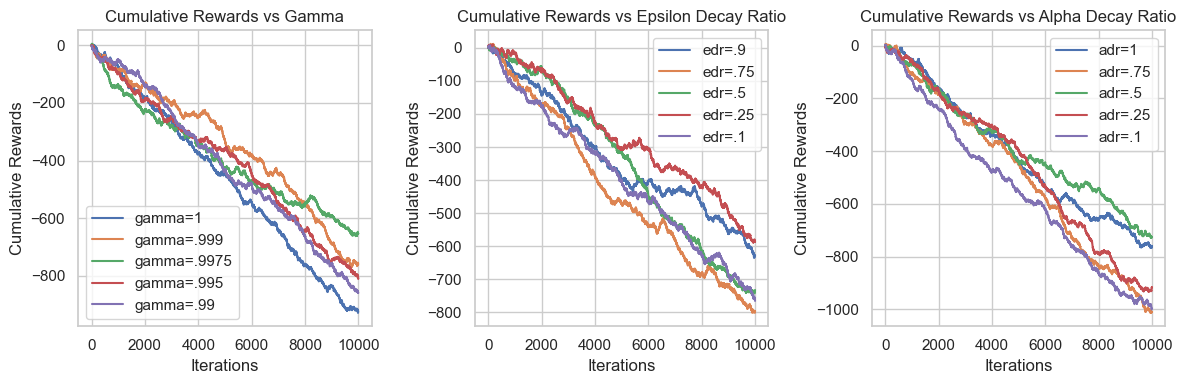

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# run VI
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma1 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma1, label='gamma=1')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.999)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma999 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma999, label='gamma=.999')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.9975)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma9975 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma9975, label='gamma=.9975')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.995)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma995 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma995, label='gamma=.995')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, gamma=.99)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
gamma99 = list(accumulate(test_scores, operator.add))
ax1.plot(gamma99, label='gamma=.99')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cumulative Rewards')
ax1.set_title('Cumulative Rewards vs Gamma')
ax1.legend()

Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax2.plot(theta10, label='edr=.9')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax2.plot(theta9, label='edr=.75')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax2.plot(theta5, label='edr=.5')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax2.plot(theta2, label='edr=.25')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax2.plot(theta1, label='edr=.1')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cumulative Rewards')
ax2.set_title('Cumulative Rewards vs Epsilon Decay Ratio')
ax2.legend()

Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, alpha_decay_ratio=1)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta10 = list(accumulate(test_scores, operator.add))
ax3.plot(theta10, label='adr=1')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.75)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta9 = list(accumulate(test_scores, operator.add))
ax3.plot(theta9, label='adr=.75')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.5)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta5 = list(accumulate(test_scores, operator.add))
ax3.plot(theta5, label='adr=.5')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.25)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta2 = list(accumulate(test_scores, operator.add))
ax3.plot(theta2, label='adr=.25')
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(n_episodes=10000, epsilon_decay_ratio=.1)
test_scores = TestEnv.test_env(env=blackjack, n_iters=10000, render=False, pi=pi, user_input=False)
theta1 = list(accumulate(test_scores, operator.add))
ax3.plot(theta1, label='adr=.1')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cumulative Rewards')
ax3.set_title('Cumulative Rewards vs Alpha Decay Ratio')
ax3.legend()

plt.tight_layout()
plt.savefig('plots/blackjack/QLearning_hyperparams_rewards.png', dpi=300)

runtime = 0.58 seconds


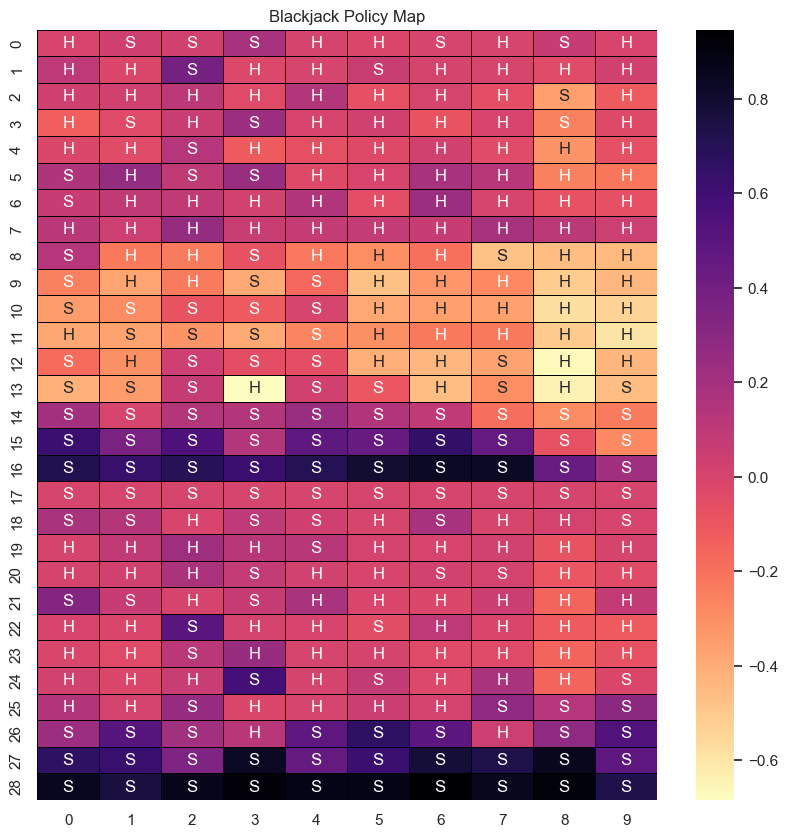

In [45]:
Q, V, pi, Q_track, pi_track = RL(blackjack).q_learning(gamma=0.99, epsilon_decay_ratio=1, n_episodes=10000)
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29,10)
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)


plt.figure(figsize=(10,10))
title = "Blackjack Policy Map"
modified_plot_policy(val_max, policy_map, blackjack_map_size, title)
plt.savefig('plots/blackjack/QLearning_policy_map.png', dpi=300)
plt.show()